<center>
    
<h2>BÀI TẬP MÔN HỌC </h2>
    
</center>
 
---
**Thông tin sinh viên:**
1. Họ tên SV: Nguyễn Chí Đan
2. Mã Sinh viên: 2121050991
3. Lớp: DCCTKH66
4. Nhóm môn học: 23K2-7080510-05


---

**Mô tả tập dữ liệu:**

Tập dữ liệu Data_Practice_ML.xlsx chứa dữ liệu của các bệnh nhân bị u vú. (chi tiết trong slide bài giảng)

Mỗi bản ghi tương ứng với một bệnh nhân, Bao gồm 8 thuộc tính:
1. PatienID: Thuộc tính cho biết mã số của bệnh nhân
2. Sex: Thuộc tính cho biết giới tính bệnh nhân
3. Age: Thuộc tính cho biết tuổi của bệnh nhân, dữ liệu số
4. Weight: Thuộc tính cho biết cân nặng của bệnh nhân (Kg)
5. Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular
6. Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị: Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated
7. Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing
8. Target: Thuộc tính cho biết khối u là lành tính (0) - hay ác tính (1)
 

## PHẦN I: CHUẨN BỊ DỮ LIỆU
---

**Yêu cầu 1:**
Đọc tập dữ liệu Data_Practice_ML.xlsx vào biến DataFrame,
- Hiển thị thông tin của biến,
- Hiển thị dữ liệu 5 bản ghi đầu tiên; 5 bản ghi cuối cùng, 5 bản ghi ngẫu nhiên
- Thống kê dữ liệu các thuộc tính số, các thuộc tính Object; đưa ra các nhận xét về dữ liệu; Có thể sử dụng các biểu đồ để thể hiện trực quan

In [145]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY!}

# Import thư viện
import pandas as pd
import matplotlib.pyplot as plt

# Đọc tập dữ liệu từ tệp Excel vào DataFrame
df_practice = pd.read_excel("Data/Data_Practice_ML.xlsx")

# Hiển thị thông tin về DataFrame
df_practice.info()

# Hiển thị 5 bản ghi đầu tiên
df_practice.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  961 non-null    object 
 1   Sex        961 non-null    object 
 2   Age        956 non-null    float64
 3   Weight     961 non-null    int64  
 4   Shape      930 non-null    object 
 5   Margin     913 non-null    object 
 6   Density    885 non-null    object 
 7   Target     961 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 60.2+ KB


,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
0,P1,Female,67.0,46,Lobular,Spiculated,Low,1
1,P2,Female,43.0,66,Round,Circumscribed,NaN,1
2,P3,Female,58.0,80,Irregular,Spiculated,Low,1
3,P4,Female,28.0,51,Round,Circumscribed,Low,0
4,P5,Female,74.0,46,Round,Spiculated,NaN,1


In [146]:
# Hiển thị 5 bản ghi cuối cùng
df_practice.tail(5)

,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
956,P957,Female,47.0,72,Oval,Circumscribed,Low,0
957,P958,Female,56.0,64,Irregular,Spiculated,Low,1
958,P959,Female,64.0,75,Irregular,Spiculated,Low,0
959,P960,Female,66.0,56,Irregular,Spiculated,Low,1
960,P961,Female,62.0,51,Lobular,Obscured,Low,0


In [147]:
# Hiển thị 5 bản ghi ngẫu nhiên
df_practice.sample(5)

,PatientID,Sex,Age,Weight,Shape,Margin,Density,Target
448,P449,Female,54.0,61,Irregular,Spiculated,Low,1
47,P48,Female,23.0,71,Round,Circumscribed,NaN,0
351,P352,Female,39.0,65,Irregular,Obscured,NaN,1
607,P608,Female,55.0,61,Round,Circumscribed,Low,0
75,P76,Female,25.0,69,Round,Circumscribed,Low,0


In [148]:
# Thống kê dữ liệu các thuộc tính số
df_practice.describe()

,Age,Weight,Target
count,956.000000,961.000000,961.000000
mean,56.306485,62.609781,0.463059
std,30.044212,10.440240,0.498893
min,18.000000,45.000000,0.000000
25%,45.000000,53.000000,0.000000
50%,57.000000,62.000000,0.000000
75%,66.000000,71.000000,1.000000
max,870.000000,80.000000,1.000000


In [149]:
# Thống kê dữ liệu các thuộc tính Object
df_practice.describe(include="object")

,PatientID,Sex,Shape,Margin,Density
count,961,961,930,913,885
unique,961,2,5,6,5
top,P1,Female,Irregular,Circumscribed,Low
freq,1,960,399,357,797


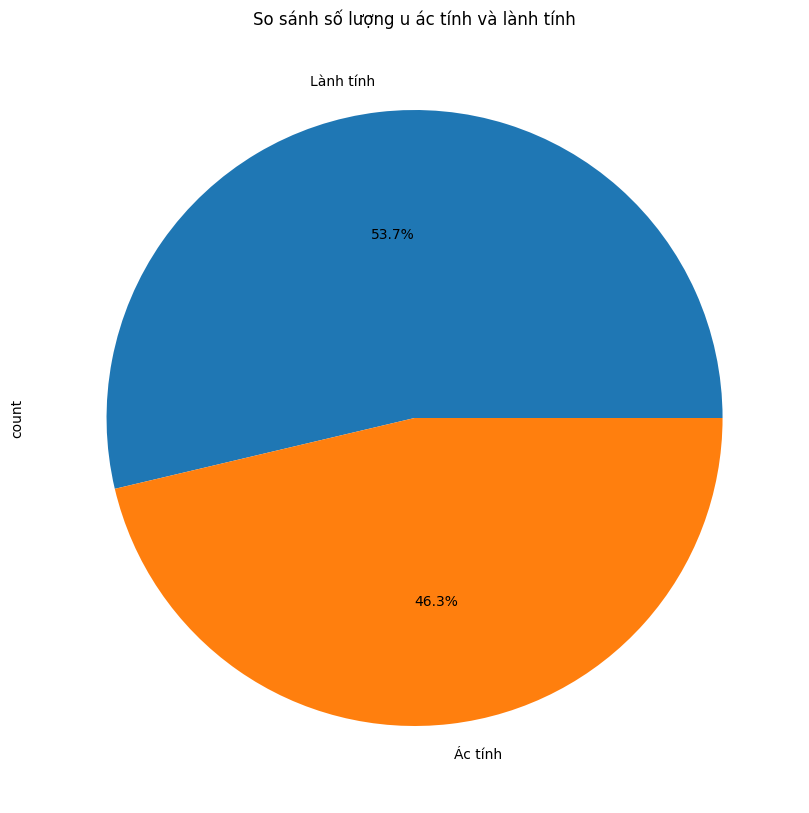

In [150]:
# Thống kê số lượng u vú theo mục tiêu
u_vu_theo_muc_tieu = df_practice['Target'].value_counts()

# Vẽ biểu đồ pie với chú thích thay đổi
u_vu_theo_muc_tieu.plot.pie(autopct="%1.1f%%", figsize=(10, 10), labels=["Lành tính", "Ác tính"])
plt.title("So sánh số lượng u ác tính và lành tính")
plt.show()

**Nhận xét:**
- Dữ lệu vẫn còn thiếu 1 số ít
- Một số dữ liệu còn có sai sót
- Theo dữ liệu phụ nữ có tỉ lệ bị u vú cao hơn nhiều so với đàn ông
- Tỉ lệ bị u vú lành tính cao hơn ác tính không nhiều (khoảng 7% so với tổng số người được thống kê)

**Yêu cầu 2:**

- Kiểm tra các bản ghi trùng lặp, các thông số bất thường trong tập dữ liệu nếu có
- Thống kê dữ liệu thiếu (missing) cho từng thuộc tính, và liệt kê ra các bản ghi bị missing tương ứng với thuộc tính đó.

In [151]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY!}
# Kiểm tra các bản ghi trùng lặp
duplicate_records = df_practice.duplicated()
print(f"Number of duplicate records: {duplicate_records.sum()}")


Number of duplicate records: 0


In [152]:
# Thống kê dữ liệu thiếu (missing) cho từng thuộc tính
missing_data = df_practice.isnull().sum()
missing_data

PatientID     0
Sex           0
Age           5
Weight        0
Shape        31
Margin       48
Density      76
Target        0
dtype: int64

In [153]:
# Liệt kê tất cả các bản ghi bị thiếu tương ứng với từng thuộc tính

# Duyệt qua từng thuộc tính
for col in df_practice.columns:
    # Lấy vị trí các giá trị bị thiếu
    missing_rows = df_practice[df_practice[col].isnull()].index
    
    # Hiển thị thông tin về các giá trị bị thiếu
    if len(missing_rows) > 0:
        print(f"Thuộc tính {col}:")
        for row in missing_rows:
            print(f" - Bản ghi {row+1}: {df_practice.loc[row, :]}")

# In thông báo về số lượng dữ liệu bị thiếu
if df_practice.isnull().sum().sum() > 0:
    print(f"Có tổng cộng {df_practice.isnull().sum().sum()} giá trị dữ liệu thiếu trong tập dữ liệu.")
else:
    print("Không có dữ liệu nào thiếu.")

Thuộc tính Age:
 - Bản ghi 444: PatientID          P444
Sex              Female
Age                 NaN
Weight               48
Shape         Irregular
Margin       Spiculated
Density             Low
Target                1
Name: 443, dtype: object
 - Bản ghi 454: PatientID           P454
Sex               Female
Age                  NaN
Weight                64
Shape          Irregular
Margin       ill-defined
Density              Low
Target                 1
Name: 453, dtype: object
 - Bản ghi 684: PatientID        P684
Sex            Female
Age               NaN
Weight             53
Shape         Lobular
Margin       Obscured
Density           Low
Target              1
Name: 683, dtype: object
 - Bản ghi 885: PatientID           P885
Sex               Female
Age                  NaN
Weight                75
Shape          Irregular
Margin       ill-defined
Density              Low
Target                 1
Name: 884, dtype: object
 - Bản ghi 924: PatientID         P924
Sex          

**Yêu cầu 3:** 

- Phân tích, thống kê - xác định mức độ ảnh hưởng của các thuộc tính độc lập [Age, Shape, Margin, Density] tới thuộc tính phụ thuộc [Target]
- Xác định thuộc tính quan trọng, không quan trọng ảnh hưởng việc u lành tính hay ác tính của bệnh nhân

**Yêu cầu 4:** 

- Đề xuất và Áp dụng các kỹ chuẩn hóa, tiền xử lý dữ liệu phù hợp cho tập dữ liệu này để có thể đưa vào các mô hình học máy
- Lưu kết quả dữ liệu sau xử lý ra file Data_Practice_ML_OK.csv

In [154]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY!}

# Thuộc tính không quan trọng ảnh hưởng đến việc u lành tính hay ác tính của bệnh nhân là: 'Sex' và 'PatientID'
# Lý do vì thuộc tính 'Sex' chỉ có 1 giá trị là Female, còn 'PatientID' không cần thiết khi ta đánh thứ tự sẵn

# Xóa thuộc tính 'Sex'
df_practice = df_practice.drop('Sex', axis=1)

# Xóa thuộc tính 'PatientID'
df_practice = df_practice.drop('PatientID', axis=1)

# Tìm vị trí của giá trị age bị nhập sai
row_index = df_practice[df_practice["Age"] == 870].index[0]

# Thay đổi giá trị age tại vị trí đó
df_practice.loc[row_index, "Age"] = 87

df_practice[df_practice['Age'].isnull()]


,Age,Weight,Shape,Margin,Density,Target
443,NaN,48,Irregular,Spiculated,Low,1
453,NaN,64,Irregular,ill-defined,Low,1
683,NaN,53,Lobular,Obscured,Low,1
884,NaN,75,Irregular,ill-defined,Low,1
923,NaN,51,Irregular,Obscured,Low,1


In [155]:

df_malignant_tumor = df_practice[df_practice['Target']==1]
df_malignant_tumor


,Age,Weight,Shape,Margin,Density,Target
0,67.0,46,Lobular,Spiculated,Low,1
1,43.0,66,Round,Circumscribed,NaN,1
2,58.0,80,Irregular,Spiculated,Low,1
4,74.0,46,Round,Spiculated,NaN,1
8,57.0,50,Round,Spiculated,Low,1
...,...,...,...,...,...,...
951,67.0,71,Irregular,Spiculated,Low,1
952,68.0,76,Irregular,ill-defined,Low,1
955,52.0,64,Irregular,ill-defined,Low,1
957,56.0,64,Irregular,Spiculated,Low,1


In [156]:
Age_malignant_tumor = round(df_malignant_tumor['Age'].mean(),0)
print('Tuổi trung bình của người mắc u ác tính là:', Age_malignant_tumor)


Tuổi trung bình của người mắc u ác tính là: 62.0


In [157]:
# Thay thế giá trị missing của thuộc tính 'Age'
df_practice.loc[(df_practice['Target']==1) & (df_practice['Age'].isnull()),\
                'Age'] = Age_malignant_tumor


In [158]:
# xem lại dữ liệu đã thay thế
df_practice.iloc[[443,453,683,884,923],:]

,Age,Weight,Shape,Margin,Density,Target
443,62.0,48,Irregular,Spiculated,Low,1
453,62.0,64,Irregular,ill-defined,Low,1
683,62.0,53,Lobular,Obscured,Low,1
884,62.0,75,Irregular,ill-defined,Low,1
923,62.0,51,Irregular,Obscured,Low,1


In [159]:

df_practice[df_practice['Weight'].isnull()]


,Age,Weight,Shape,Margin,Density,Target


In [160]:

df_practice[df_practice['Shape'].isnull()]


,Age,Weight,Shape,Margin,Density,Target
6,70.0,62,NaN,NaN,Low,0
9,60.0,77,NaN,Spiculated,High,1
20,66.0,68,NaN,NaN,High,1
48,42.0,60,NaN,NaN,Fat-containing,0
54,53.0,72,NaN,Spiculated,Low,1
74,70.0,74,NaN,ill-defined,NaN,1
83,57.0,69,NaN,ill-defined,High,0
128,52.0,56,NaN,ill-defined,NaN,0
157,51.0,57,NaN,NaN,Low,0
163,53.0,46,NaN,ill-defined,Low,0


In [161]:
# Kiểm tra giá trị nhập sai của Shape
df_practice['Shape'].unique()


array(['Lobular', 'Round', 'Irregular', nan, 'Oval', 'IRREGULAR'],
      dtype=object)

In [162]:
# Đổi giá trị nhập sai về đúng
df_practice.loc[(df_practice['Shape']=='IRREGULAR'),\
                'Shape'] = 'Irregular'
df_practice['Shape'].unique()

array(['Lobular', 'Round', 'Irregular', nan, 'Oval'], dtype=object)

In [163]:

# Chia ra làm 2 loại để xử lý dữ liệu Shape bị missing gồm: bị u ác tính và bị u lành tính

# danh sách giá trị missing của Shape bị u ác tính
df_shape_missing_malignant_tumor = df_practice[((df_practice['Target']==1) & (df_practice['Shape'].isnull()))]
df_shape_missing_malignant_tumor


,Age,Weight,Shape,Margin,Density,Target
9,60.0,77,NaN,Spiculated,High,1
20,66.0,68,NaN,NaN,High,1
54,53.0,72,NaN,Spiculated,Low,1
74,70.0,74,NaN,ill-defined,NaN,1
496,82.0,80,NaN,Spiculated,Low,1
537,63.0,71,NaN,ill-defined,Low,1
554,70.0,63,NaN,Spiculated,Low,1
614,46.0,56,NaN,Spiculated,NaN,1
660,58.0,57,NaN,ill-defined,Low,1
662,50.0,58,NaN,NaN,Low,1


In [164]:
# Tìm giá trị shape của người bị u ác tính chiếm tỉ lệ nhiều nhất
df_shape_malignant_tumor = df_practice[df_practice['Target']==1]
most_shape_malignant_tumor = df_shape_malignant_tumor['Shape'].value_counts().idxmax()
most_shape_malignant_tumor

'Irregular'

In [165]:
# Thay giá trị tìm được ở trên vào các giá trị shape của người mắc u ác tính bị missing
df_practice.loc[(df_practice['Target']==1) & (df_practice['Shape'].isnull()),\
                'Shape'] = most_shape_malignant_tumor

In [166]:
# Danh sách vừa thay thế
df_practice.iloc[[9,20,54,74,496,537,554,614,660,662,752,824],:]

,Age,Weight,Shape,Margin,Density,Target
9,60.0,77,Irregular,Spiculated,High,1
20,66.0,68,Irregular,NaN,High,1
54,53.0,72,Irregular,Spiculated,Low,1
74,70.0,74,Irregular,ill-defined,NaN,1
496,82.0,80,Irregular,Spiculated,Low,1
537,63.0,71,Irregular,ill-defined,Low,1
554,70.0,63,Irregular,Spiculated,Low,1
614,46.0,56,Irregular,Spiculated,NaN,1
660,58.0,57,Irregular,ill-defined,Low,1
662,50.0,58,Irregular,NaN,Low,1


In [167]:
# thực hiện tương tự với shape bị missing mắc u lành tính
df_shape_missing_benign_tumor = df_practice[((df_practice['Target']==0) & (df_practice['Shape'].isnull()))]
df_shape_missing_benign_tumor

,Age,Weight,Shape,Margin,Density,Target
6,70.0,62,NaN,NaN,Low,0
48,42.0,60,NaN,NaN,Fat-containing,0
83,57.0,69,NaN,ill-defined,High,0
128,52.0,56,NaN,ill-defined,NaN,0
157,51.0,57,NaN,NaN,Low,0
163,53.0,46,NaN,ill-defined,Low,0
236,60.0,63,NaN,Obscured,High,0
255,76.0,61,NaN,Obscured,Iso,0
387,64.0,63,NaN,NaN,Low,0
388,49.0,70,NaN,Obscured,Low,0


In [168]:
df_shape_benign_tumor = df_practice[df_practice['Target']==0]
most_shape_benign_tumor = df_shape_benign_tumor['Shape'].value_counts().idxmax()
most_shape_benign_tumor

'Round'

In [169]:
df_practice.loc[(df_practice['Target']==0) & (df_practice['Shape'].isnull()),\
                'Shape'] = most_shape_benign_tumor
df_practice.iloc[[6,48,83,128,157,163,236,255,387,388,389,394,476,519,531,561,581,661,778]]

,Age,Weight,Shape,Margin,Density,Target
6,70.0,62,Round,NaN,Low,0
48,42.0,60,Round,NaN,Fat-containing,0
83,57.0,69,Round,ill-defined,High,0
128,52.0,56,Round,ill-defined,NaN,0
157,51.0,57,Round,NaN,Low,0
163,53.0,46,Round,ill-defined,Low,0
236,60.0,63,Round,Obscured,High,0
255,76.0,61,Round,Obscured,Iso,0
387,64.0,63,Round,NaN,Low,0
388,49.0,70,Round,Obscured,Low,0


In [170]:
df_practice[df_practice['Margin'].isnull()]

,Age,Weight,Shape,Margin,Density,Target
5,65.0,72,Round,NaN,Low,0
6,70.0,62,Round,NaN,Low,0
7,42.0,51,Round,NaN,Low,0
12,64.0,67,Round,NaN,Low,0
19,40.0,67,Round,NaN,NaN,0
20,66.0,68,Irregular,NaN,High,1
22,43.0,54,Round,NaN,NaN,0
27,63.0,47,Lobular,NaN,Low,0
35,77.0,49,Lobular,NaN,NaN,0
48,42.0,60,Round,NaN,Fat-containing,0


In [171]:
# Kiểm tra xem có giá trị nào nhập sai không
df_practice['Margin'].unique()

array(['Spiculated', 'Circumscribed', nan, 'ill-defined', 'Obscured',
       'SPICULATED', 'Microlobulated'], dtype=object)

In [172]:
# Sửa lại giá trị nhập sai
df_practice.loc[(df_practice['Margin']=='SPICULATED'),\
                'Margin'] = 'Spiculated'
df_practice['Margin'].unique()

array(['Spiculated', 'Circumscribed', nan, 'ill-defined', 'Obscured',
       'Microlobulated'], dtype=object)

In [173]:
# Trường hợp missing của margin làm giống như trên
# danh sách giá trị missing của margin bị u ác tính
df_margin_missing_malignant_tumor = df_practice[((df_practice['Target']==1) & (df_practice['Margin'].isnull()))]

# Tìm giá trị margin của người bị u ác tính chiếm tỉ lệ nhiều nhất
df_margin_malignant_tumor = df_practice[df_practice['Target']==1]
most_margin_malignant_tumor = df_margin_malignant_tumor['Margin'].value_counts().idxmax()
most_margin_malignant_tumor

'ill-defined'

In [174]:
# Thay giá trị tìm được ở trên vào các giá trị margin của người mắc u ác tính bị missing
df_practice.loc[(df_practice['Target']==1) & (df_practice['Margin'].isnull()),\
                'Margin'] = most_margin_malignant_tumor

In [175]:
# thực hiện tương tự với margin bị missing mắc u lành tính
df_margin_missing_benign_tumor = df_practice[((df_practice['Target']==0) & (df_practice['Margin'].isnull()))]

# Tìm giá trị margin của người bị u lành tính chiếm tỉ lệ nhiều nhất
df_margin_benign_tumor = df_practice[df_practice['Target']==0]
most_margin_benign_tumor = df_margin_benign_tumor['Margin'].value_counts().idxmax()
most_margin_benign_tumor

'Circumscribed'

In [176]:
# Thay giá trị tìm được ở trên vào các giá trị margin của người mắc u lành tính bị missing
df_practice.loc[(df_practice['Target']==0) & (df_practice['Margin'].isnull()),\
                'Margin'] = most_margin_benign_tumor

In [177]:
df_practice[df_practice['Density'].isnull()]

,Age,Weight,Shape,Margin,Density,Target
1,43.0,66,Round,Circumscribed,NaN,1
4,74.0,46,Round,Spiculated,NaN,1
19,40.0,67,Round,Circumscribed,NaN,0
22,43.0,54,Round,Circumscribed,NaN,0
26,66.0,80,Round,Circumscribed,NaN,0
...,...,...,...,...,...,...
614,46.0,56,Irregular,Spiculated,NaN,1
627,57.0,49,Oval,Circumscribed,NaN,0
665,27.0,54,Oval,Circumscribed,NaN,0
677,57.0,58,Irregular,ill-defined,NaN,1


In [178]:
# Trường hợp Density cũng được chia làm 2 trường hợp giống trên
# danh sách giá trị missing của Density bị u ác tính
df_density_missing_malignant_tumor = df_practice[((df_practice['Target']==1) & (df_practice['Density'].isnull()))]

# Tìm giá trị Density của người bị u ác tính chiếm tỉ lệ nhiều nhất
df_density_malignant_tumor = df_practice[df_practice['Target']==1]
most_density_malignant_tumor = df_density_malignant_tumor['Density'].value_counts().idxmax()
most_density_malignant_tumor

'Low'

In [179]:
# Thay giá trị tìm được ở trên vào các giá trị Density của người mắc u ác tính bị missing
df_practice.loc[(df_practice['Target']==1) & (df_practice['Density'].isnull()),\
                'Density'] = most_density_malignant_tumor

In [180]:
# thực hiện tương tự với Density bị missing mắc u lành tính
df_density_missing_benign_tumor = df_practice[((df_practice['Target']==0) & (df_practice['Density'].isnull()))]

# Tìm giá trị Density của người bị u lành tính chiếm tỉ lệ nhiều nhất
df_density_benign_tumor = df_practice[df_practice['Target']==0]
most_density_benign_tumor = df_density_benign_tumor['Density'].value_counts().idxmax()
most_density_benign_tumor

'Low'

In [181]:
# Thay giá trị tìm được ở trên vào các giá trị margin của người mắc u lành tính bị missing
df_practice.loc[(df_practice['Target']==0) & (df_practice['Density'].isnull()),\
                'Density'] = most_margin_benign_tumor

In [182]:
# Kiểm tra xem có giá trị nào nhập sai không
df_practice['Density'].unique()

array(['Low', 'High', 'Iso', 'Circumscribed', 'Fat-containing', 'LOW'],
      dtype=object)

In [183]:
# Sửa lại giá trị nhập sai
df_practice.loc[(df_practice['Density']=='Circumscribed'),\
                'Density'] = 'Fat-containing'
df_practice.loc[(df_practice['Density']=='LOW'),\
                'Density'] = 'Low'
df_practice['Density'].unique()

array(['Low', 'High', 'Iso', 'Fat-containing'], dtype=object)

In [184]:
df_practice[df_practice['Target'].isnull()]


,Age,Weight,Shape,Margin,Density,Target


In [185]:
df_practice.describe()

,Age,Weight,Target
count,961.000000,961.000000,961.000000
mean,55.521332,62.609781,0.463059
std,14.449979,10.440240,0.498893
min,18.000000,45.000000,0.000000
25%,45.000000,53.000000,0.000000
50%,57.000000,62.000000,0.000000
75%,66.000000,71.000000,1.000000
max,96.000000,80.000000,1.000000


**Thay thế tuổi tuyệt đối của người được thống kê bằng khoảng mà tuổi thuộc vào:**
* Từ 18 --> 40 tuổi:   --> Age = 1
* Từ 41 --> 60 tuổi:   --> Age = 2
* Trên 61 tuổi     :   --> Age = 3

In [186]:
df_practice.loc[(df_practice['Age'] >= 18) & (df_practice['Age'] <= 40), 'Age'] = 1
df_practice.loc[(df_practice['Age'] > 40) & (df_practice['Age'] <= 60), 'Age'] = 2
df_practice.loc[ df_practice['Age'] > 60, 'Age'] = 3

#Ép Age sang kiểu dữ liệu số nguyên
df_practice['Age'] = df_practice['Age'].astype(int)

df_practice

,Age,Weight,Shape,Margin,Density,Target
0,3,46,Lobular,Spiculated,Low,1
1,2,66,Round,Circumscribed,Low,1
2,2,80,Irregular,Spiculated,Low,1
3,1,51,Round,Circumscribed,Low,0
4,3,46,Round,Spiculated,Low,1
...,...,...,...,...,...,...
956,2,72,Oval,Circumscribed,Low,0
957,2,64,Irregular,Spiculated,Low,1
958,3,75,Irregular,Spiculated,Low,0
959,3,56,Irregular,Spiculated,Low,1


**Thay thế cân nặng tuyệt đối của người được thống kê bằng khoảng mà cân nặng thuộc vào:**
* Từ 45 --> 57 kg:   --> Weight = 1
* Từ 58 --> 68 kg:   --> Weight = 2
* Trên 69 kg     :   --> Weight = 3

In [187]:
df_practice.loc[(df_practice['Weight'] >= 45) & (df_practice['Weight'] <= 57), 'Weight'] = 1
df_practice.loc[(df_practice['Weight'] > 57) & (df_practice['Weight'] <= 68), 'Weight'] = 2
df_practice.loc[ df_practice['Weight'] > 68, 'Weight'] = 3

#Ép Weight sang kiểu dữ liệu số nguyên
df_practice['Weight'] = df_practice['Weight'].astype(int)

df_practice

,Age,Weight,Shape,Margin,Density,Target
0,3,1,Lobular,Spiculated,Low,1
1,2,2,Round,Circumscribed,Low,1
2,2,3,Irregular,Spiculated,Low,1
3,1,1,Round,Circumscribed,Low,0
4,3,1,Round,Spiculated,Low,1
...,...,...,...,...,...,...
956,2,3,Oval,Circumscribed,Low,0
957,2,2,Irregular,Spiculated,Low,1
958,3,3,Irregular,Spiculated,Low,0
959,3,1,Irregular,Spiculated,Low,1


In [188]:
df_practice['Shape'].unique()

array(['Lobular', 'Round', 'Irregular', 'Oval'], dtype=object)

In [189]:
#Chuyển đổi thuộc tính Shape về dạng số nguyên (int)
# Trong đó: Round = 0, Oval = 1, Lobular = 2, Irregular = 3

df_practice['Shape'] = df_practice['Shape'].map({'Round':0, 'Oval': 1, 'Lobular': 2, 'Irregular': 3}).astype(int)
df_practice.sample(5)

,Age,Weight,Shape,Margin,Density,Target
39,2,2,2,ill-defined,Iso,0
916,2,3,0,Circumscribed,Low,0
194,2,1,0,Circumscribed,Low,0
73,3,2,3,ill-defined,Low,1
6,3,2,0,Circumscribed,Low,0


In [190]:
#Chuyển đổi thuộc tính Margin về dạng số nguyên (int)
# Trong đó: Circumscribed = 0, Microlobulated = 1, Obscured = 2, ill-defined = 3, Spiculated = 4

df_practice['Margin'] = df_practice['Margin'].map({'Circumscribed': 0, 'Microlobulated' : 1, 'Obscured': 2, 'ill-defined': 3, 'Spiculated': 4}).astype(int)
df_practice.sample(5)

,Age,Weight,Shape,Margin,Density,Target
865,1,1,3,3,Low,0
616,3,3,0,4,Low,1
381,2,1,3,2,Low,1
451,1,3,1,0,Low,0
119,3,3,3,4,Low,0


In [191]:
#Chuyển đổi thuộc tính Density về dạng số nguyên (int)
# Trong đó: High = 0, Iso = 1, Low = 2, Fat-containing = 3

df_practice['Density'] = df_practice['Density'].map({'High': 0, 'Iso': 1, 'Low': 2, 'Fat-containing': 3}).astype(int)
df_practice.sample(5)

,Age,Weight,Shape,Margin,Density,Target
447,1,1,0,0,2,0
216,2,2,1,3,2,0
656,3,3,3,3,2,1
591,2,1,3,3,2,1
87,1,2,0,0,3,0


In [192]:
# Lưu file kết quả chuẩn bị dữ liệu

# CSV
df_practice.to_csv('Data_Practice_ML_OK.csv',index=None)

#Excel
df_practice.to_excel('Data_Practice_ML_OK.xlsx',index=None)